## DIA 004: Regresión Polinominal y Overfitting


La Regresión Polinomial es una extensión de la regresión lineal que permite modelar relaciones no lineales entre las variables independientes y la variable dependiente. Al introducir términos polinomiales (por ejemplo,x2, x3, etc.), el modelo puede capturar curvaturas en los datos que una regresión lineal simple no podría.

Sin embargo, al aumentar la complejidad del modelo con términos polinomiales de alto grado, se corre el riesgo de overfitting (sobreajuste). El overfitting ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento, capturando también el ruido y las fluctuaciones aleatorias, lo que resulta en un rendimiento deficiente en datos no vistos (generalización).

En este ejercicio, aprenderás a:

- Implementar regresión polinomial utilizando scikit-learn.
- Visualizar cómo el aumento del grado del polinomio afecta el ajuste del modelo.
- Identificar y mitigar el overfitting mediante técnicas como la regularización y la validación cruzada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
import joblib

# 1. Cargar el dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [2]:
# 2. Seleccion de caracteristicas
X = df[['MedInc']].values
y = df['MedHouseVal'].values

In [3]:
# 3. Division de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 4. Función para regresion polinomial
def polynomial_regression(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, poly, y_pred, mse, r2

In [5]:
# 5. Entrenamiento y evaluación para diferentes grados
degrees = [1, 2, 3, 4, 5]
results = {}

for degree in degrees:
    model, poly, y_pred, mse, r2 = polynomial_regression(degree, X_train, y_train, X_test, y_test)
    results[degree] = {'model': model, 'poly': poly, 'mse': mse, 'r2': r2}
    print(f"Grado {degree}: MSE = {mse:.4f}, R² = {r2:.4f}")

Grado 1: MSE = 0.6299, R² = 0.4589
Grado 2: MSE = 0.6283, R² = 0.4633
Grado 3: MSE = 0.6219, R² = 0.4671
Grado 4: MSE = 0.6219, R² = 0.4673
Grado 5: MSE = 0.6214, R² = 0.4668


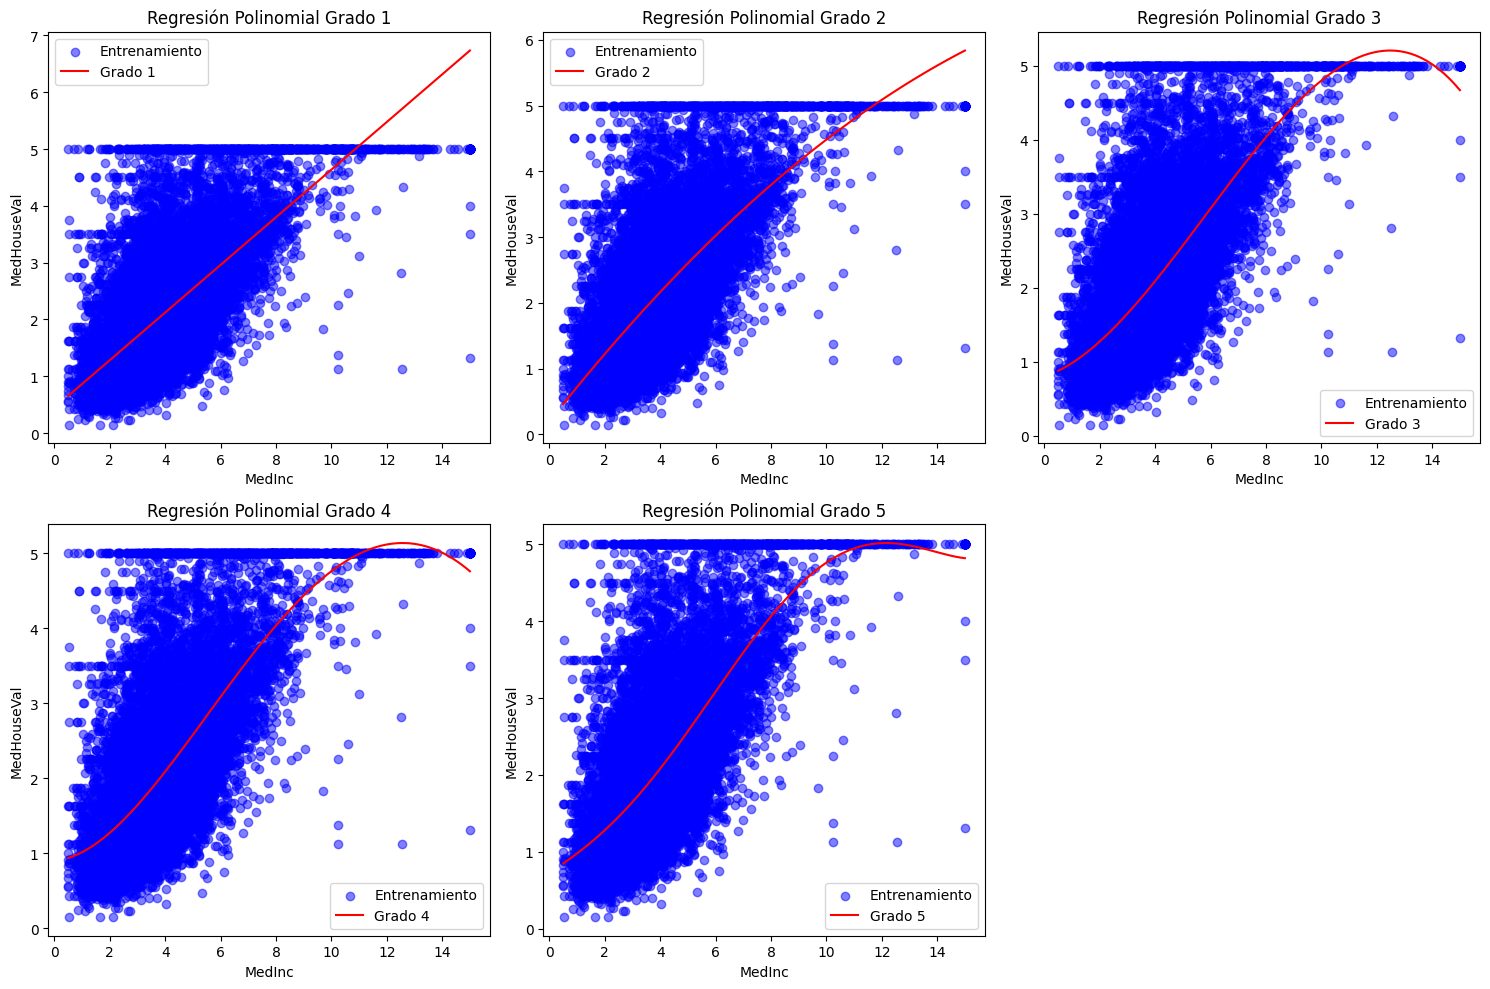

In [6]:
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    model = results[degree]['model']
    poly = results[degree]['poly']
    y_pred = results[degree]['model'].predict(poly.transform(X_test))
    
    plt.subplot(2, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Entrenamiento', alpha=0.5)
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, color='red', label=f'Grado {degree}')
    plt.title(f'Regresión Polinomial Grado {degree}')
    plt.xlabel('MedInc')
    plt.ylabel('MedHouseVal')
    plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# 7. Comparación de métricas
metrics = pd.DataFrame({
    'Grado': degrees,
    'MSE': [results[deg]['mse'] for deg in degrees],
    'R²': [results[deg]['r2'] for deg in degrees]
})
print("\nMétricas de Regresión Polinomial:")
print(metrics)


Métricas de Regresión Polinomial:
   Grado       MSE        R²
0      1  0.629909  0.458859
1      2  0.628292  0.463318
2      3  0.621896  0.467116
3      4  0.621889  0.467262
4      5  0.621369  0.466796


In [9]:
# 8. Implementación de Ridge Regression para grado 5
degree = 5
alpha = 1.0

def ridge_polynomial_regression(degree, alpha, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)

    y_pred = ridge.predict(X_test_poly)

    mse = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return ridge, poly, y_pred, mse, r2

ridge_model, ridge_poly, ridge_y_pred, ridge_mse, ridge_r2 = ridge_polynomial_regression(degree, alpha, X_train, y_train, X_test, y_test)
print(f"\nRidge Grado {degree}: MSE = {ridge_mse:.4f}, R² = {ridge_r2:.4f}")



Ridge Grado 5: MSE = 0.6214, R² = 0.4668


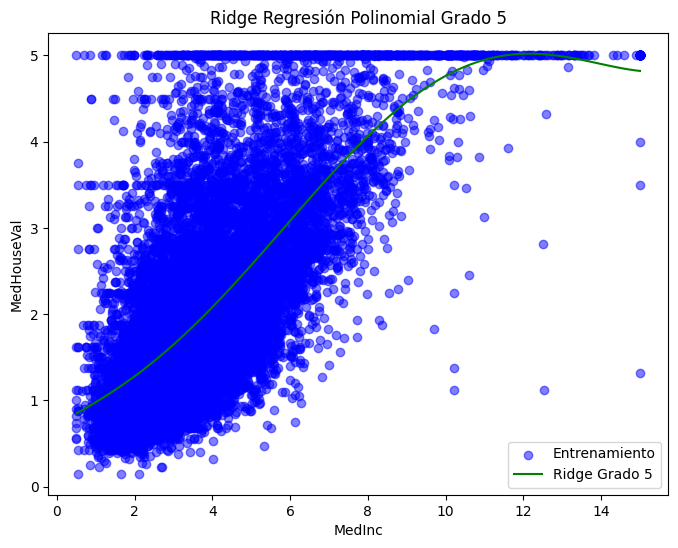

In [10]:
# 9. Visualización del modelo Ridge
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento', alpha=0.5)
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = ridge_poly.transform(X_plot)
y_plot = ridge_model.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color='green', label=f'Ridge Grado {degree}')
plt.title(f'Ridge Regresión Polinomial Grado {degree}')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()

In [11]:
# 10. Guardar el modelo Ridge entrenado
joblib.dump(ridge_model, f'ridge_poly_reg_degree_{degree}.pkl')
print(f"Modelo Ridge Grado {degree} guardado como 'ridge_poly_reg_degree_{degree}.pkl'")

Modelo Ridge Grado 5 guardado como 'ridge_poly_reg_degree_5.pkl'
